### Milestone 1: Project Narrative and Initial Graphical Analysis

##### Project Narrative

The real estate market, with its cyclical nature and regional variability, presents a complex but intriguing challenge for predictive analysis. Our project aims to leverage the Zillow Housing Prices / Sales Data, focusing specifically on the middle price tier of single-family residences and condominiums across various U.S. metropolitan areas. The core objective of this analysis is to predict future housing prices, offering valuable insights for investors, policymakers, and potential homeowners.

##### Problem Statement: 

The real estate market is influenced by numerous factors, including economic indicators, location, property features, and market sentiment. This complexity makes predicting housing prices a challenging yet crucial task. Our project seeks to address this challenge by developing a predictive model that can accurately forecast home values in different metropolitan areas over the short to medium term. The target for our model is the future sales price of homes, aiming to provide a reliable tool for decision-making.

#####  Importance: 

Accurate predictions can help stakeholders make informed decisions, ranging from investment strategies for real estate portfolios to policy formulation for housing affordability. For individual buyers and sellers, understanding future market trends can influence timing and financing decisions.

##### Graphical Analysis

To begin our analysis, we will create a series of graphs to explore the dataset, focusing on trends, patterns, and regional variations in housing prices.

##### Graph 1: Overall Trend of Median Home Values in the United States
This graph will plot the median home values across the entire United States over time, providing an overview of the general market trend.

##### Graph 2: Comparative Trends for Top 5 Metropolitan Areas
Here, we'll compare the housing price trends of the top 5 metropolitan areas by size rank, highlighting regional differences and growth patterns.

##### Graph 3: Seasonality in Housing Prices
A month-wise analysis to detect any seasonality in housing prices, which could influence the timing of buying or selling properties.

##### Graph 4: Price Distribution across Metropolitan Areas

A box plot to show the distribution of median home values across different metropolitan areas, identifying outliers and variance in prices.

##### Insights and Conclusion

From the graphical analysis, we aim to identify key trends, such as the overall direction of the housing market, regional disparities in price growth, and potential seasonal patterns in buying and selling activities. Understanding these dynamics will be crucial for developing a predictive model that can accurately forecast future housing prices.

We anticipate that this initial exploration will reveal significant regional variations, affirm the existence of seasonal trends in housing prices, and highlight the market's long-term growth trajectory. These insights will lay the groundwork for feature selection and model development, guiding us in incorporating variables that capture the essence of market dynamics effectively.

This project represents a step towards demystifying the real estate market, aiming to provide a robust analytical tool for a wide range of stakeholders. By delving into the complexities of housing price predictions, we strive to offer clarity and foresight in a market characterized by its unpredictability.



In [4]:
# Let's start by loading the dataset to understand its structure and contents.
import pandas as pd

# Load the dataset /Users/bbeardsley/Desktop
file_path = '/Users/bbeardsley/Desktop/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to get an overview
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23,9/30/23,10/31/23,11/30/23,12/31/23
0,102001,0,United States,country,NaN,118707.0674,118915.9112,119174.9082,119730.4061,120369.7175,...,331792.5562,332737.0943,334329.4533,336227.2397,337939.1841,339527.7952,340727.9981,341626.1162,342262.3625,342684.5956
1,394913,1,"New York, NY",msa,NY,214711.9573,215624.3620,216545.2172,218411.2261,220343.5430,...,601872.0942,603866.6802,607870.2450,612012.4029,615590.7643,618868.2507,621576.9746,623908.5304,626205.5482,628950.9050
2,753899,2,"Los Angeles, CA",msa,CA,216061.0854,216865.1068,217936.0556,220066.8840,222397.3422,...,829993.3902,827670.4795,831367.2213,838986.1405,849938.7198,863190.3959,876570.5488,887702.9486,896080.6941,901341.5140
3,394463,3,"Chicago, IL",msa,IL,148346.5696,148483.8954,148745.4346,149396.0792,150178.7264,...,284826.2308,286470.5976,288600.4455,291089.7111,293559.9127,295944.9814,297722.6465,299046.1612,299933.1232,300548.5328
4,394514,4,"Dallas, TX",msa,TX,123115.4924,123170.3285,123233.3681,123397.0756,123612.9193,...,360809.1335,360269.2872,360549.1460,361350.0265,362306.4309,363208.8966,363615.1881,363727.2725,363591.4722,363272.4026


/var/folders/hh/_79_23pd4k195159hkhl38980000gq/T/ipykernel_66025/3901594437.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data['Month'] = ny_data['Date'].dt.month


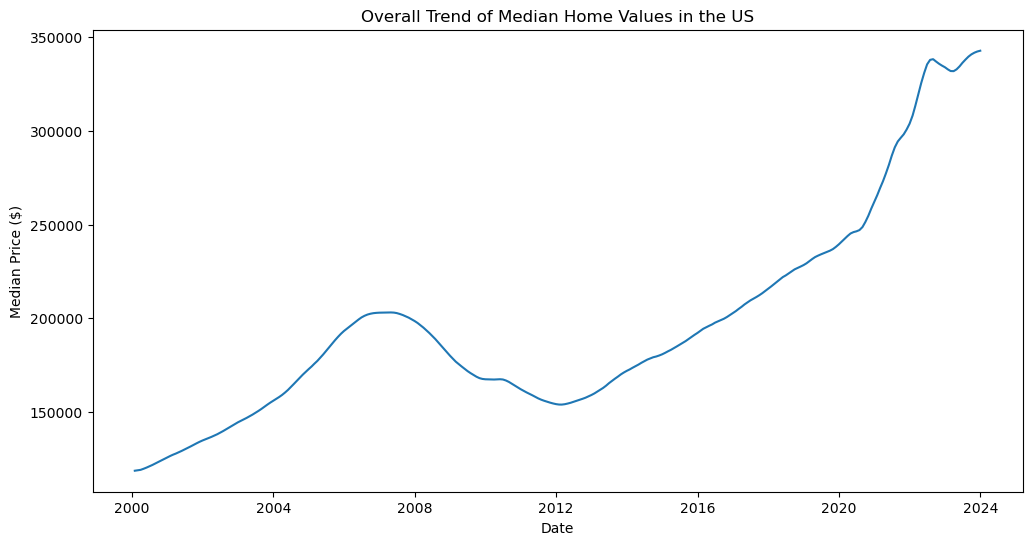

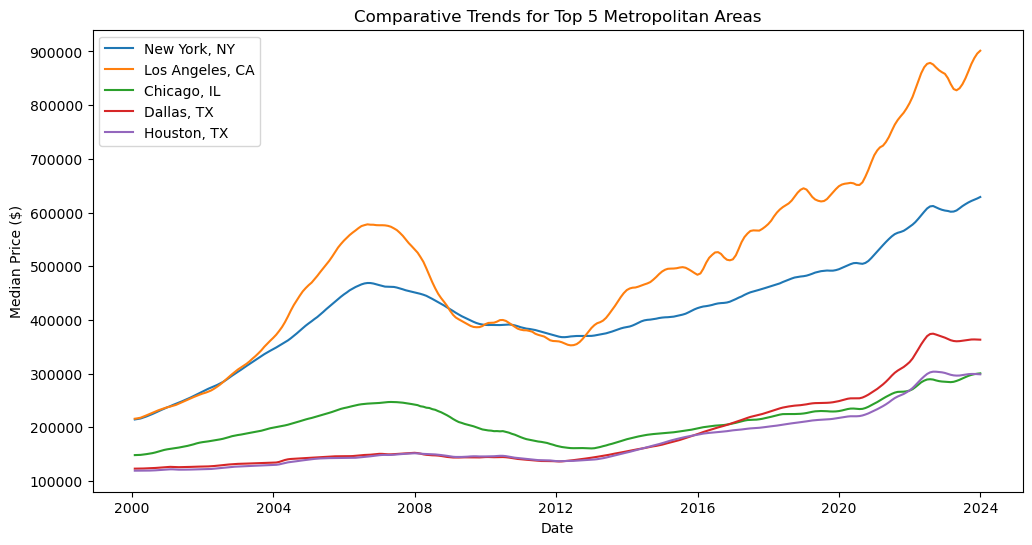

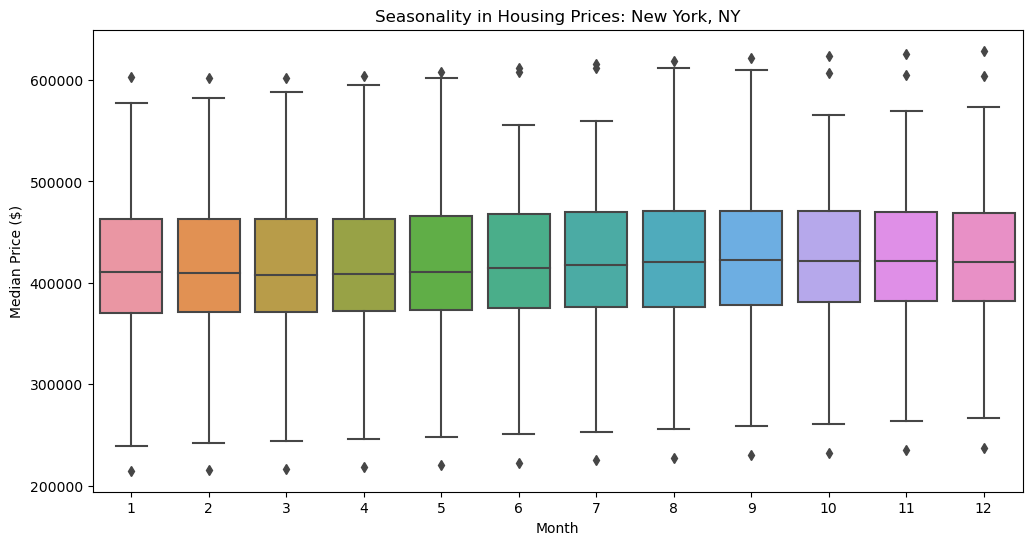

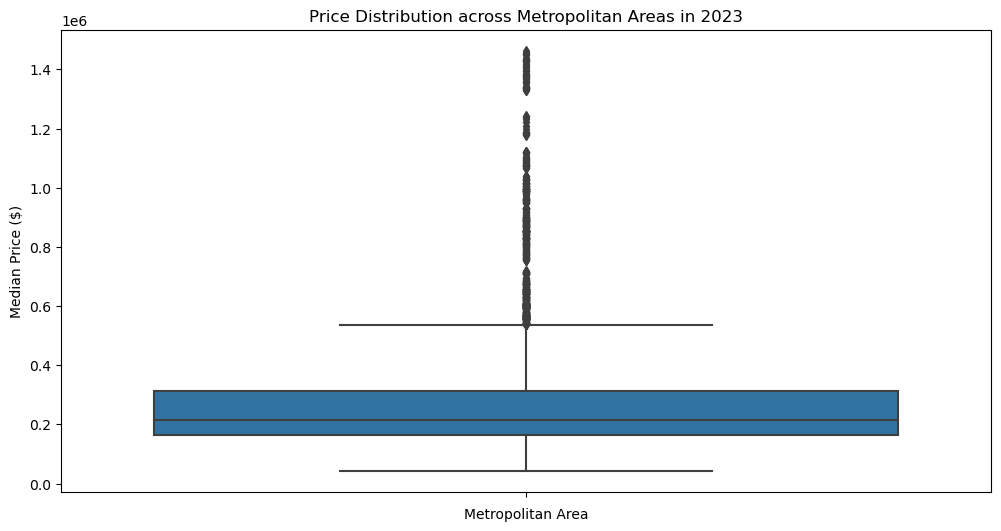

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and read the data
file_path = '/Users/bbeardsley/Desktop/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' columns to a datetime format for easier plotting
data_long = pd.melt(data, id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"], var_name="Date", value_name="MedianPrice")
data_long['Date'] = pd.to_datetime(data_long['Date'])

# Ensure that MedianPrice is numeric for plotting
data_long['MedianPrice'] = pd.to_numeric(data_long['MedianPrice'], errors='coerce')

# Plot 1: Overall Trend of Median Home Values in the US
plt.figure(figsize=(12, 6))
us_data = data_long[data_long['RegionName'] == 'United States']
sns.lineplot(x='Date', y='MedianPrice', data=us_data)
plt.title('Overall Trend of Median Home Values in the US')
plt.xlabel('Date')
plt.ylabel('Median Price ($)')

# Plot 2: Comparative Trends for Top 5 Metropolitan Areas by SizeRank
plt.figure(figsize=(12, 6))
for i in range(1, 6):
    metro_data = data_long[data_long['SizeRank'] == i]
    sns.lineplot(x='Date', y='MedianPrice', data=metro_data, label=metro_data['RegionName'].iloc[0])
plt.title('Comparative Trends for Top 5 Metropolitan Areas')
plt.xlabel('Date')
plt.ylabel('Median Price ($)')
plt.legend()

# Plot 3: Seasonality in Housing Prices for a selected region
# Let's use New York, NY as an example for detailed seasonality analysis
plt.figure(figsize=(12, 6))
ny_data = data_long[data_long['RegionName'] == 'New York, NY']
ny_data['Month'] = ny_data['Date'].dt.month
sns.boxplot(x='Month', y='MedianPrice', data=ny_data)
plt.title('Seasonality in Housing Prices: New York, NY')
plt.xlabel('Month')
plt.ylabel('Median Price ($)')

# Plot 4: Price Distribution across Metropolitan Areas in the Latest Year
# Assuming the latest year data is present
plt.figure(figsize=(12, 6))
latest_year = data_long['Date'].dt.year.max()
latest_data = data_long[data_long['Date'].dt.year == latest_year]
sns.boxplot(y='MedianPrice', data=latest_data)
plt.title(f'Price Distribution across Metropolitan Areas in {latest_year}')
plt.xlabel('Metropolitan Area')
plt.ylabel('Median Price ($)')

plt.show()